In [153]:
from skimage import io, filters, color, measure, morphology
import matplotlib.pyplot as plt
import numpy as np
import os

In [154]:
def similitudeMoments(image):
    if image.max() > 1:
        image = image / 255.0

    x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
    m00 = np.sum(image)
    m10 = np.sum(x * image)
    m01 = np.sum(y * image)
    xcentroid = m10 / m00
    ycentroid = m01 / m00
    # print(f'xcentroid is {xcentroid}, ycentroid is {ycentroid}')

    central_moments = [np.sum(((x - xcentroid)**p * (y - ycentroid)**q) * image) for p,q in [(0, 2), (0, 3), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0)]]
    
    Nvals = [central_moments[k] / (m00 ** ((i+j)/2 + 1)) for k, (i, j) in enumerate([(0, 2), (0, 3), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0)])]

    return Nvals

In [155]:
# Calculate and store 7 similitude moments of template images to a dictionary
templates = {}
hu = {}
for file in os.listdir('templates/'):
    filepath = os.path.join('templates/', file)
    image = io.imread(filepath, as_gray=True)
    image = image < 0.5
    image = morphology.dilation(image, morphology.square(3))
    seven_moments = similitudeMoments(image)
    filename = file.split('.PNG')[0]
    templates[filename] = seven_moments

    moments = measure.moments_central(image)
    normalized_moments = measure.moments_normalized(moments)
    hu_moments = measure.moments_hu(normalized_moments) 
    hu[filename] = hu_moments

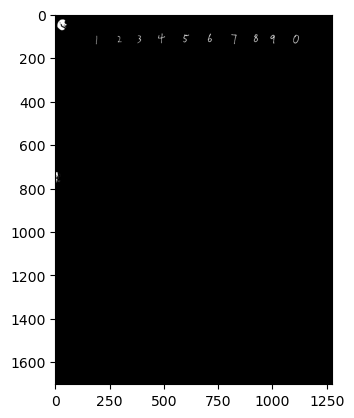

In [156]:
# Load the image and convert to binary
image = io.imread('image/test1.jpg')

gray_image = color.rgb2gray(image)

# gray_image = filters.gaussian(gray_image, sigma=1)

thresh = 0.2
binary_image = gray_image < thresh

plt.imshow(binary_image, cmap='gray')
plt.show()

key is 0, distance is 1.2017521218121405, min distance is inf
key is 1, distance is 0.47254141853588194, min distance is 1.2017521218121405
key is 2, distance is 1.2222093592444088, min distance is 0.47254141853588194
key is 3, distance is 1.0304010725122101, min distance is 0.47254141853588194
key is 4, distance is 1.3062534664294185, min distance is 0.47254141853588194
key is 5, distance is 0.9703738032333804, min distance is 0.47254141853588194
key is 6, distance is 1.0238741018844144, min distance is 0.47254141853588194
key is 7, distance is 1.0019276995827688, min distance is 0.47254141853588194
key is 8, distance is 1.2426292595686617, min distance is 0.47254141853588194
key is 9, distance is 1.1596797438835083, min distance is 0.47254141853588194
1


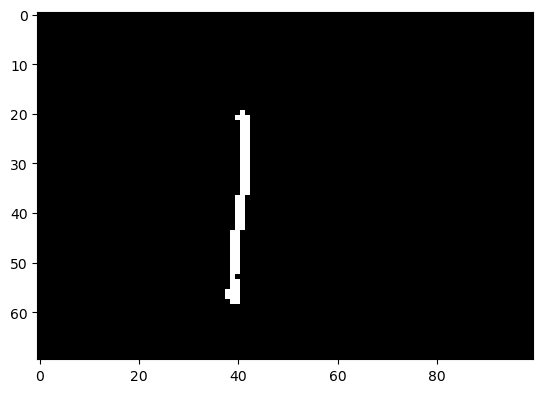

In [157]:
# Crop and test
test_image = binary_image[80:150 , 150:250]
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}, min distance is {min_distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

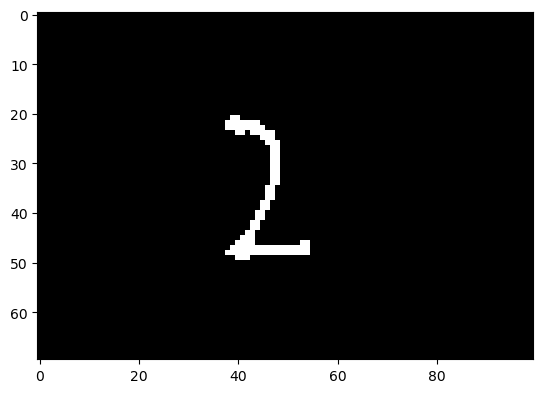

key is 0, distance is 0.5687433719957256
key is 1, distance is 0.3995546561443346
key is 2, distance is 0.5004366166481622
key is 3, distance is 0.4141569198761432
key is 4, distance is 0.6778416518306336
key is 5, distance is 0.4508335013464151
key is 6, distance is 0.2855092256001807
key is 7, distance is 0.7068804868195613
key is 8, distance is 0.6025496368432858
key is 9, distance is 0.6269746207369351
6

hu moments
key is 0, distance is 0.7359448481453872
key is 1, distance is 0.7875149258029485
key is 2, distance is 0.7054864552439404
key is 3, distance is 0.47436373770324025
key is 4, distance is 0.788749050132724
key is 5, distance is 0.4447530161347374
key is 6, distance is 0.467255722342643
key is 7, distance is 0.588388514322782
key is 8, distance is 0.8133395924433963
key is 9, distance is 0.6447553771797442
5


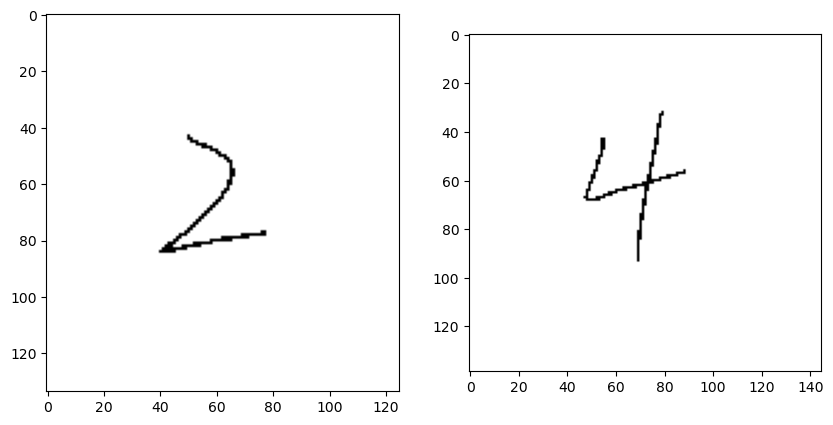

In [158]:
# Crop and test
test_image = binary_image[80:150 , 250:350]
# test_image = morphology.dilation(test_image, morphology.square(3))
plt.imshow(test_image, cmap='gray')
plt.show()

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

moments = measure.moments_central(test_image)
normalized_moments = measure.moments_normalized(moments)
hu_moments = measure.moments_hu(normalized_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

best_match = None
min_distance = float('inf')
print('\nhu moments')
for key, moments in hu.items():
    # moments = np.array(moments)
    distance = np.linalg.norm(hu_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

two = io.imread('templates/2.PNG', as_gray=True)
two = two > 0.5
four = io.imread('templates/4.PNG', as_gray=True)
four = four > 0.5
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(two, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(four, cmap='gray')

key is 0, distance is 0.37548117844381473
key is 1, distance is 0.45300916207406045
key is 2, distance is 0.4524506287888962
key is 3, distance is 0.21174774014046427
key is 4, distance is 0.4979753055319275
key is 5, distance is 0.1718742836527631
key is 6, distance is 0.37172614096162815
key is 7, distance is 0.40905251073026155
key is 8, distance is 0.4171433439787401
key is 9, distance is 0.38627112937352864
5

hu moments
key is 0, distance is 0.5015482911798393
key is 1, distance is 0.997021200533308
key is 2, distance is 0.4599232787123426
key is 3, distance is 0.23309169122454873
key is 4, distance is 0.5472161366679212
key is 5, distance is 0.2455191347098882
key is 6, distance is 0.23598649939102612
key is 7, distance is 0.5134287324022658
key is 8, distance is 0.5711005879414168
key is 9, distance is 0.3983265894754325
3


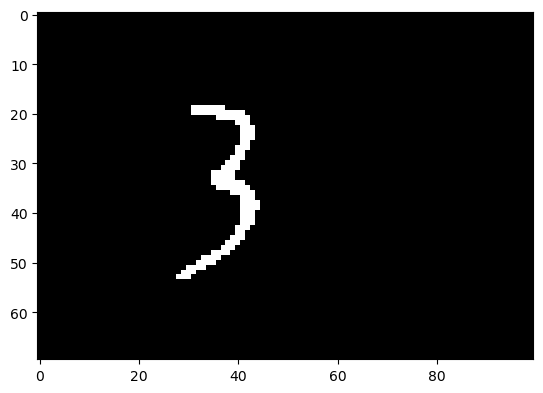

In [159]:
# Crop and test
test_image = binary_image[80:150 , 350:450]
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

moments = measure.moments_central(test_image)
normalized_moments = measure.moments_normalized(moments)
hu_moments = measure.moments_hu(normalized_moments)

best_match = None
min_distance = float('inf')
print('\nhu moments')
for key, moments in hu.items():
    # moments = np.array(moments)
    distance = np.linalg.norm(hu_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key


print(best_match)

key is 0, distance is 0.1956512730018276
key is 1, distance is 0.8133784220201097
key is 2, distance is 0.4103996211087145
key is 3, distance is 0.3843399555491203
key is 4, distance is 0.1598134678705189
key is 5, distance is 0.3030037310457036
key is 6, distance is 0.4870225938842582
key is 7, distance is 0.4327134568798405
key is 8, distance is 0.25209714637537356
key is 9, distance is 0.21243943868179366
4

hu moments
key is 0, distance is 0.15570053031705303
key is 1, distance is 1.459019283849761
key is 2, distance is 0.08797000864265006
key is 3, distance is 0.2585544900002829
key is 4, distance is 0.1135230409391007
key is 5, distance is 0.3364367390932843
key is 6, distance is 0.26330086115589957
key is 7, distance is 0.675236186066628
key is 8, distance is 0.25589690154872663
key is 9, distance is 0.19736431028867005
2


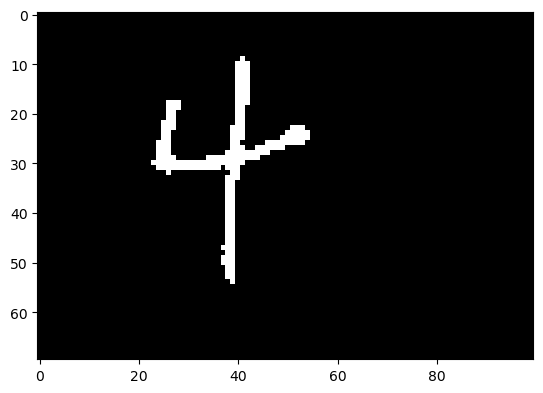

In [160]:
# Crop and test
test_image = binary_image[80:150 , 450:550]
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

moments = measure.moments_central(test_image)
normalized_moments = measure.moments_normalized(moments)
hu_moments = measure.moments_hu(normalized_moments)

best_match = None
min_distance = float('inf')
print('\nhu moments')
for key, moments in hu.items():
    # moments = np.array(moments)
    distance = np.linalg.norm(hu_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key


print(best_match)

key is 0, distance is 0.2254067189321847
key is 1, distance is 0.6417753961909937
key is 2, distance is 0.42046308619802475
key is 3, distance is 0.3080016032010505
key is 4, distance is 0.29990689731670717
key is 5, distance is 0.14899949782621835
key is 6, distance is 0.4294560272882564
key is 7, distance is 0.37215263917470476
key is 8, distance is 0.280354212047513
key is 9, distance is 0.2321426807417227
5

hu moments
key is 0, distance is 0.22037303859363241
key is 1, distance is 1.251192067232317
key is 2, distance is 0.20683335304263853
key is 3, distance is 0.11991864961936964
key is 4, distance is 0.2655192400159208
key is 5, distance is 0.14396162774732613
key is 6, distance is 0.06341370535565917
key is 7, distance is 0.6178001095779763
key is 8, distance is 0.31515761924091545
key is 9, distance is 0.15820369224520683
6


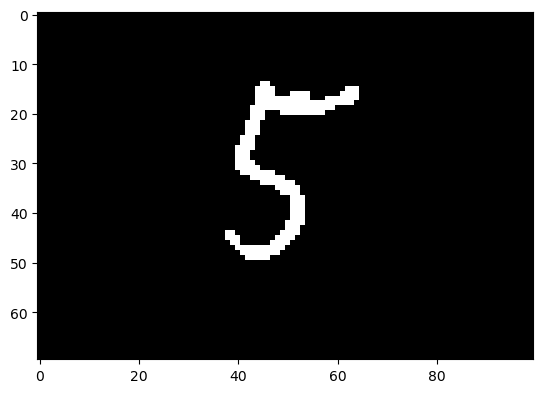

In [161]:
# Crop and test
test_image = binary_image[80:150 , 550:650]
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

moments = measure.moments_central(test_image)
normalized_moments = measure.moments_normalized(moments)
hu_moments = measure.moments_hu(normalized_moments)

best_match = None
min_distance = float('inf')
print('\nhu moments')
for key, moments in hu.items():
    # moments = np.array(moments)
    distance = np.linalg.norm(hu_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key


print(best_match)

key is 0, distance is 1.348796681521539
key is 1, distance is 1.1086235492958711
key is 2, distance is 1.1754837427621696
key is 3, distance is 1.1885967711373795
key is 4, distance is 1.4263585129086118
key is 5, distance is 1.2961325485342734
key is 6, distance is 1.0834217382977742
key is 7, distance is 1.5758648369355757
key is 8, distance is 1.4009613252725466
key is 9, distance is 1.511931239158209
6


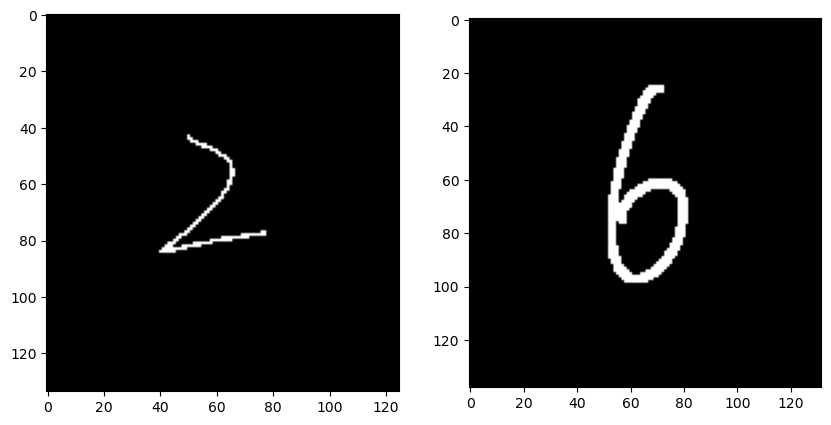

In [163]:
test_image = io.imread('templates/2.PNG', as_gray=True)
test_image = test_image < 0.5

# plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(test_image, cmap='gray')
plt.subplot(1,2,2)
match_image = io.imread(f'templates/{best_match}.PNG',as_gray=True)
match_image = match_image < 0.5
match_image = morphology.dilation(match_image, morphology.square(3))
plt.imshow(match_image, cmap='gray')
plt.show()


In [164]:
for key, moments in templates.items():
    print(f'{key}: {moments}')

0: [0.45540068542491974, 0.016288395070233556, -0.061270591624130746, -0.004134670461792942, 0.1864308411010879, 0.004313063071945272, 0.004210918520886901]
1: [1.175576267751757, -0.058763250514712456, -0.13836455703126846, -0.015384366783199516, 0.022529952496217472, 0.00428354474075298, -0.0007399729240153435]
2: [0.4570216793944604, -0.20098372555313077, -0.05914814814814815, -0.038787106916769204, 0.20074797282489593, 0.0695322577658256, 0.008861425812612133]
3: [0.6362018793114856, -0.0422161979467915, -0.10199713441882034, -0.12431883825364802, 0.16701903996213477, 0.09715214842821021, -0.055260954424098035]
4: [0.3652414473829134, 0.04407320344460071, -0.04196632372192944, 0.05681417893169717, 0.2514386685576181, -0.040928295286727534, -0.03553532892716137]
5: [0.6844152091025086, 0.08255839813555381, -0.09533763774394939, -0.028972168633295246, 0.14296212630641733, 0.0027966049642373916, -0.0036937277137353004]
6: [0.6646015542787993, -0.2287164313820739, 0.011622212887804491,